Design Naive Bayes Classifier from scratch for the given Dataset and find out the accuracy of your model.

Importing All the desired libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

Importing Dataset

In [2]:
print("\nCars Dataset:")
df = pd.read_csv("cars.csv")
df



Cars Dataset:


,buying,maint,doors,persons,lug_boot,safety,clazz
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   clazz     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


We can see that there are no missing values in the dataset

## Finding Categorical Variable

In [4]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 7 categorical variables

The categorical variables are :

 ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'clazz']


## Plotting 'target' variable to see the distribution of data:

<AxesSubplot:>

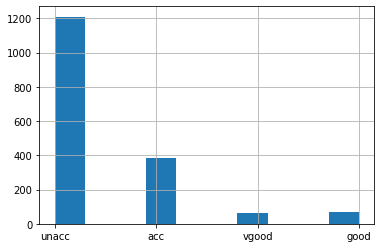

In [14]:
df["clazz"].hist()

### Partioning data into features and target

In [6]:
def pre_processing(df):
    X = df.drop([df.columns[-1]], axis = 1)
    y = df[df.columns[-1]]
    return X, y

In [7]:
X,y  = pre_processing(df)
X,y
#X - feature vector
#y - Target

(     buying  maint  doors persons lug_boot safety
 0     vhigh  vhigh      2       2    small    low
 1     vhigh  vhigh      2       2    small    med
 2     vhigh  vhigh      2       2    small   high
 3     vhigh  vhigh      2       2      med    low
 4     vhigh  vhigh      2       2      med    med
 ...     ...    ...    ...     ...      ...    ...
 1723    low    low  5more    more      med    med
 1724    low    low  5more    more      med   high
 1725    low    low  5more    more      big    low
 1726    low    low  5more    more      big    med
 1727    low    low  5more    more      big   high
 
 [1728 rows x 6 columns],
 0       unacc
 1       unacc
 2       unacc
 3       unacc
 4       unacc
         ...  
 1723     good
 1724    vgood
 1725    unacc
 1726     good
 1727    vgood
 Name: clazz, Length: 1728, dtype: object)

# NaiveBayes Class:

In [8]:
class  NaiveBayes:
    def __init__(self):
        self.features = list
        self.likelihoods = {}
        self.class_priors = {}
        self.pred_priors = {}

        self.X_train = np.array
        self.y_train = np.array
        self.train_size = int
        self.num_feats = int

    def fit(self, X, y):
        self.features = list(X.columns)
        self.X_train = X
        self.y_train = y
        self.train_size = X.shape[0]
        self.num_feats = X.shape[1]

        for feature in self.features:
            self.likelihoods[feature] = {}
            self.pred_priors[feature] = {}

            for feat_val in np.unique(self.X_train[feature]):
                self.pred_priors[feature].update({feat_val: 0})

                for outcome in np.unique(self.y_train):
                    self.likelihoods[feature].update({feat_val+'_'+outcome:0})
                    self.class_priors.update({outcome: 0})

        self._calc_class_prior()
        self._calc_likelihoods()
        self._calc_predictor_prior()

        
    # -------------------------------------P(c) - Prior Class Probability--------------------------------------------------
    def _calc_class_prior(self):
        for outcome in np.unique(self.y_train):
            outcome_count = sum(self.y_train == outcome)
            self.class_priors[outcome] = outcome_count / self.train_size

    # -------------------------------------------P(x|c) - Likelihood------------------------------------------------------
    def _calc_likelihoods(self):
        for feature in self.features:
            for outcome in np.unique(self.y_train):
                outcome_count = sum(self.y_train == outcome)
                feat_likelihood = self.X_train[feature][self.y_train[self.y_train == outcome].index.values.tolist()].value_counts().to_dict()
                for feat_val, count in feat_likelihood.items():
                    self.likelihoods[feature][feat_val + '_' + outcome] = count/outcome_count

    
    # ---------------------------------------------P(x) - Evidence--------------------------------------------------------
    def _calc_predictor_prior(self):
        for feature in self.features:
            feat_vals = self.X_train[feature].value_counts().to_dict()
            for feat_val, count in feat_vals.items():
                self.pred_priors[feature][feat_val] = count/self.train_size

                
    # -------------------------------------- Calculates Posterior probability P(c|x) -------------------------------------            
    def predict(self, X):
        results = []
        X = np.array(X)

        for query in X:
            probs_outcome = {}
            for outcome in np.unique(self.y_train):
                prior = self.class_priors[outcome]
                likelihood = 1
                evidence = 1

                for feat, feat_val in zip(self.features, query):
                    likelihood *= self.likelihoods[feat][feat_val + '_' + outcome]
                    evidence *= self.pred_priors[feat][feat_val]
                    
                posterior = (likelihood * prior) / (evidence)
                probs_outcome[outcome] = posterior
                
            result = max(probs_outcome, key = lambda x: probs_outcome[x])
            results.append(result)

        return np.array(results)

### To find Accuracy:

In [9]:
def accuracy_score(y_true, y_pred):
    return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100 ,2)

In [10]:
nbCar = NaiveBayes()
nbCar.fit(X, y)
print("Train Accuracy: {}".format(accuracy_score(y, nbCar.predict(X))))

Train Accuracy: 87.38


### Checking Some Queries

In [11]:
#Query 1:
query = np.array([['vhigh','vhigh', '2','2','small','low']])
print("Query 1:- {} ---> {}".format(query, nbCar.predict(query)))

Query 1:- [['vhigh' 'vhigh' '2' '2' 'small' 'low']] ---> ['unacc']


In [12]:
#Query 2:
query = np.array([['low','low','5more','more','med','med','good']])
print("Query 2:- {} ---> {}".format(query, nbCar.predict(query)))

Query 2:- [['low' 'low' '5more' 'more' 'med' 'med' 'good']] ---> ['good']


In [13]:
#Query 3:
query = np.array([['low','low','5more','more','med','high','good']])
print("Query 3:- {} ---> {}".format(query, nbCar.predict(query)))

Query 3:- [['low' 'low' '5more' 'more' 'med' 'high' 'good']] ---> ['vgood']
